In [1]:
import pandas as pd

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
sales = pd.read_csv('sales_pre.csv')

In [4]:
sales.head()

,date,shop_id,item_id,item_price,item_cnt_day,income,day,month,year,y_m,m_d
0,02.01.2013,59,22154,999.00000,1.00000,999.00000,2,1,2013,1,1
1,03.01.2013,25,2552,899.00000,1.00000,899.00000,3,1,2013,1,2
2,06.01.2013,25,2554,1709.05000,1.00000,1709.05000,6,1,2013,1,3
3,15.01.2013,25,2555,1099.00000,1.00000,1099.00000,15,1,2013,1,4
4,10.01.2013,25,2564,349.00000,1.00000,349.00000,10,1,2013,1,5


## 2013~2015 연간 아이템 판매량

In [5]:
item_cnt_year = sales.groupby(['year'])['item_cnt_day'].sum()

In [6]:
item_cnt_year #2015년 자료는 빠진 월이 있어서 자료 비교가 용이하지않음.

year
2013   1565896.00000
2014   1323594.00000
2015    766256.00000
Name: item_cnt_day, dtype: float64

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='year'>

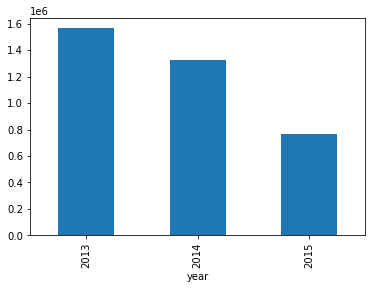

In [8]:
item_cnt_year.plot.bar()

#### 2013~2015 연간 아이템판매량을 11월 12월 값을 제외하고 비교

In [9]:
sales2 =sales[(sales['month'] != 11) & (sales['month'] != 12)] 

In [10]:
item_cnt_year_not1112 = sales2.groupby('year')['item_cnt_day'].sum()

In [11]:
item_cnt_year_not1112

year
2013   1251956.00000
2014   1036489.00000
2015    766256.00000
Name: item_cnt_day, dtype: float64

<AxesSubplot:xlabel='year'>

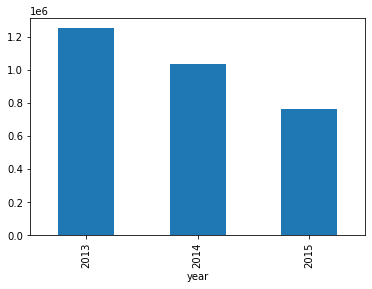

In [12]:
item_cnt_year_not1112.plot.bar()

In [13]:
sales.groupby('year')['income'].sum()
#e+09 ; 지수표기법 소수점에서 왼쪽9칸~

year
2013   1221143470.88000
2014   1351025506.54999
2015    837687056.13999
Name: income, dtype: float64

In [14]:
sales.groupby('year')['income'].sum().sort_values()

year
2015    837687056.13999
2013   1221143470.88000
2014   1351025506.54999
Name: income, dtype: float64

#### 월간 아이템 판매량 비교

In [15]:
item_cnt_month = sales.groupby('month')['item_cnt_day'].sum()

<AxesSubplot:xlabel='month'>

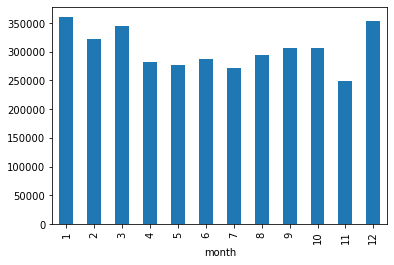

In [16]:
item_cnt_month.plot.bar()

#### 일간 아이템 판매량 비교

<AxesSubplot:xlabel='day'>

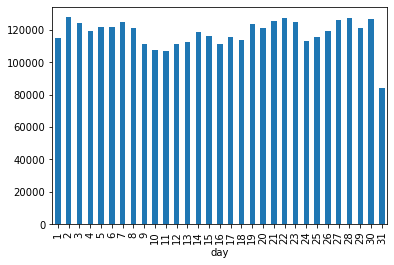

In [17]:
sales.groupby('day')['item_cnt_day'].sum().plot.bar()

#31일은 없는 달도 있어서 

<AxesSubplot:xlabel='day'>

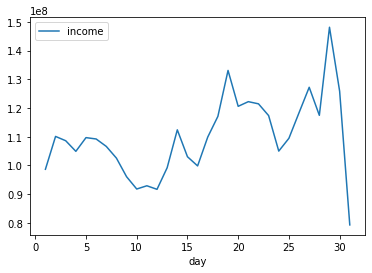

In [18]:
sales.groupby('day')['income'].sum().plot(legend=True)
#판매량은 비슷했는데 수익이 높았다? ==> 비싼 물건을 많이 팔았다 월말에!!

#### 상점별 연월별 아이템 판매량

In [19]:
sales.columns

Index(['date', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'income',
       'day', 'month', 'year', 'y_m', 'm_d'],
      dtype='object')

In [20]:
shop_month = sales.groupby(['shop_id','y_m'])['item_cnt_day'].sum().reset_index()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='y_m', ylabel='item_cnt_day'>

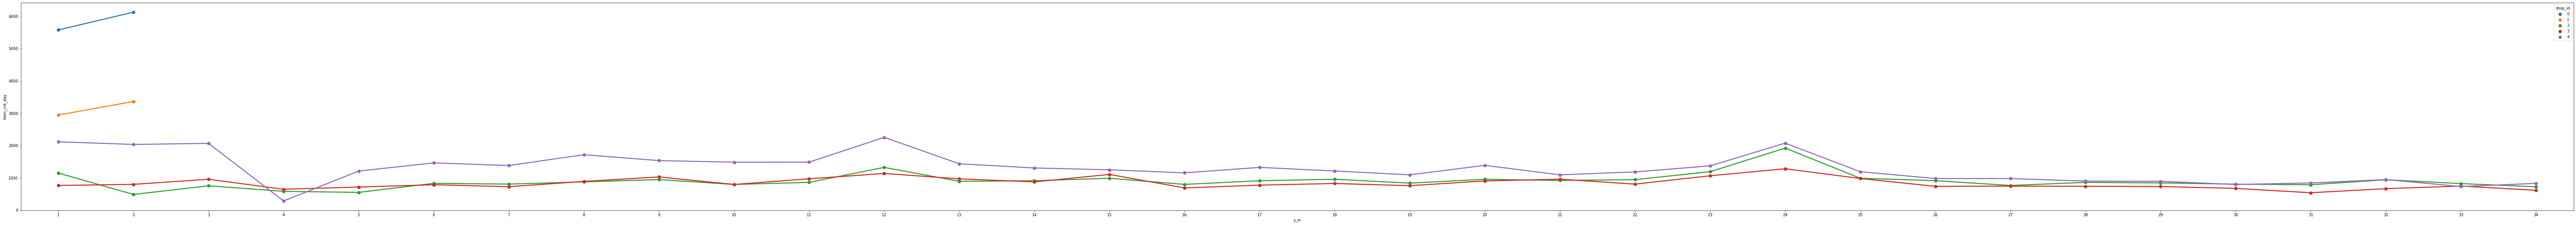

In [22]:
plt.figure(figsize = (120,10))
sns.pointplot(x='y_m', y='item_cnt_day', hue='shop_id',
             data = shop_month[shop_month['shop_id'] < 5 ])

#### 상품별 연월별 아이템 판매량 ? 한번해 보기

In [23]:
item_y_m = sales.groupby(['item_id','y_m'])['item_cnt_day'].sum().reset_index()

In [24]:
item_y_m

,item_id,y_m,item_cnt_day
0,0,21,1.00000
1,1,16,2.00000
2,1,19,1.00000
3,1,20,1.00000
4,1,21,1.00000
...,...,...,...
233797,22168,1,2.00000
233798,22168,2,2.00000
233799,22168,3,1.00000
233800,22168,9,1.00000


In [ ]:
plt.figure(figsize = (120,10))
sns.pointplot(x='y_m', y='item_cnt_day', hue='item_id',
             data = item_y_m)